In [5]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

image_size = 64

X = np.load('imgs.npy')
encoded = np.load('encoded.npy')

k=5, silhouette score=0.128
k=6, silhouette score=0.115
k=7, silhouette score=0.105
k=8, silhouette score=0.103
k=9, silhouette score=0.099
k=10, silhouette score=0.102
k=11, silhouette score=0.100
k=12, silhouette score=0.099
k=13, silhouette score=0.101
k=14, silhouette score=0.103

Best k: 5


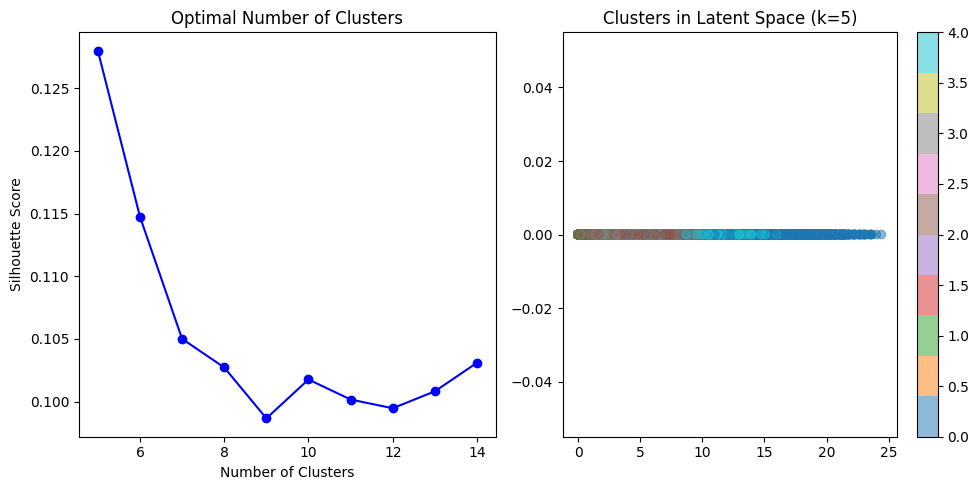

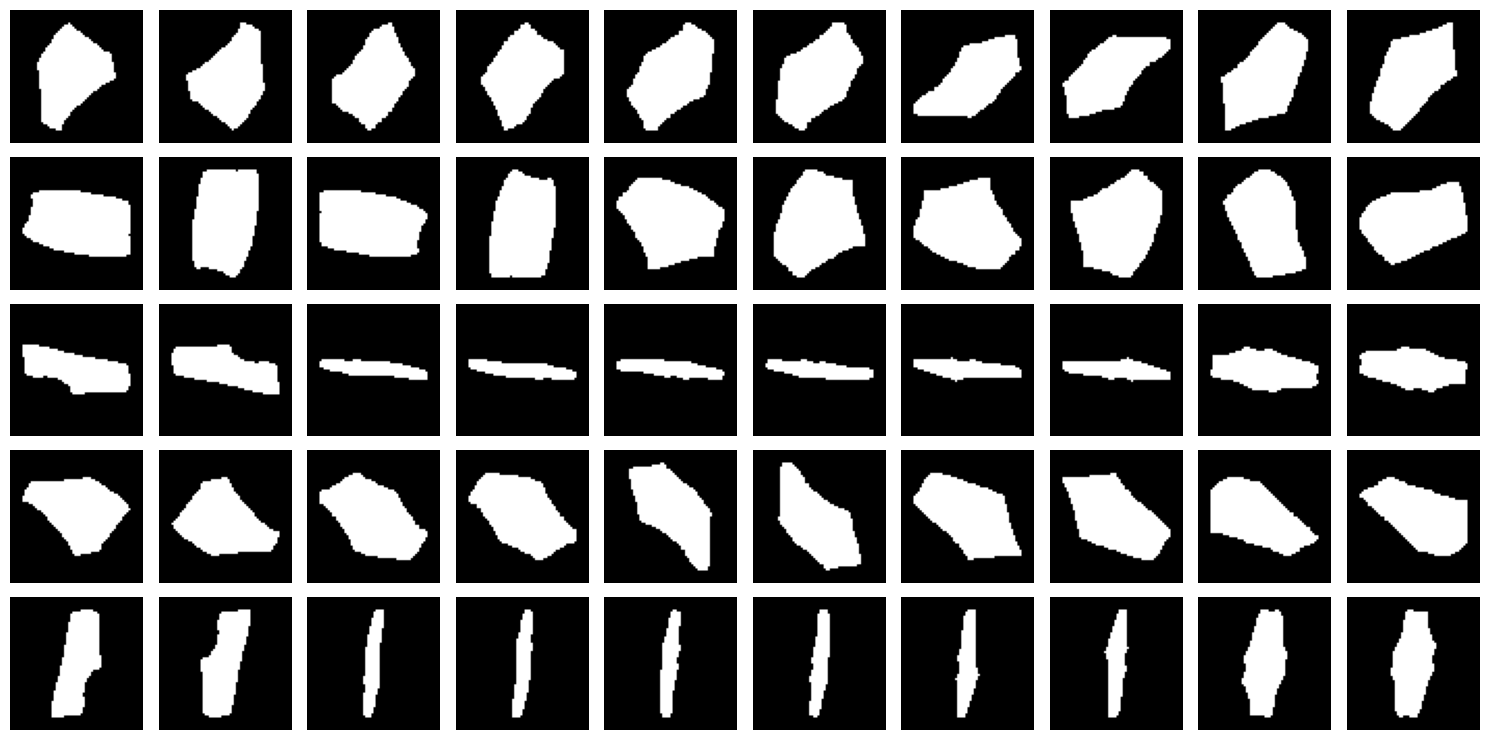

NameError: name 'y_train_new' is not defined

In [ ]:
# Find optimal number of clusters
silhouette_scores = []
K_range = range(5, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(encoded)
    score = silhouette_score(encoded, labels)
    silhouette_scores.append(score)
    print(f"k={k}, silhouette score={score:.3f}")

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Optimal Number of Clusters')

In [8]:
silhouette_scores

[np.float32(0.12798053),
 np.float32(0.11473847),
 np.float32(0.10500258),
 np.float32(0.10272491),
 np.float32(0.098667786),
 np.float32(0.10176551),
 np.float32(0.100167684),
 np.float32(0.09947277),
 np.float32(0.100823194),
 np.float32(0.10310068)]

In [ ]:

# Use best k
best_k = K_range[np.argmax(silhouette_scores)]
print(f"\nBest k: {best_k}")

# Final clustering
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=20)
labels = kmeans.fit_predict(encoded)

# Visualize clusters in latent space
plt.subplot(1, 2, 2)
plt.scatter(encoded[:, 0], encoded[:, 1], c=labels, cmap='tab10', alpha=0.5)
plt.title(f'Clusters in Latent Space (k={best_k})')
plt.colorbar()
plt.tight_layout()
plt.show()

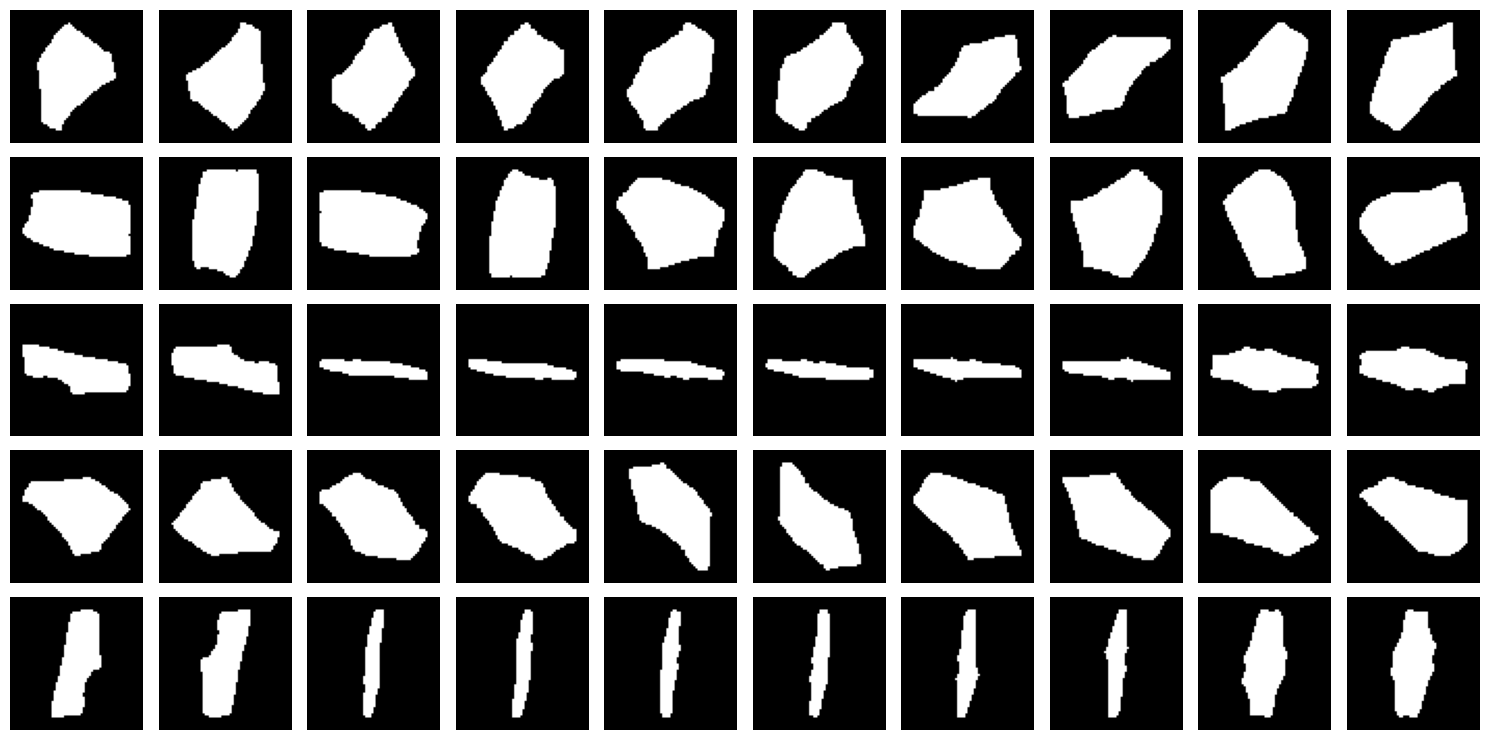


New label distribution: [8317 9388 8122 8531 7790]


In [7]:

# Show example images from each cluster
fig, axes = plt.subplots(best_k, 10, figsize=(15, best_k * 1.5))
for cluster in range(best_k):
    cluster_imgs = X[labels == cluster][:10]
    for i, img in enumerate(cluster_imgs):
        if best_k == 1:
            axes[i].imshow(img.reshape(image_size, image_size), cmap='gray')
            axes[i].axis('off')
        else:
            axes[cluster, i].imshow(img.reshape(image_size, image_size), cmap='gray')
            axes[cluster, i].axis('off')
        if i == 0:
            if best_k == 1:
                axes[i].set_title(f'Cluster {cluster}', fontsize=10)
            else:
                axes[cluster, i].set_ylabel(f'Cluster {cluster}', rotation=0, labelpad=30)
plt.tight_layout()
plt.savefig('cluster_examples.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nNew label distribution: {np.bincount(labels)}")